Top_had_masss statistics:
  Entries      : 10000
  Mean         : 176.55 GeV
  Std Dev      : 17.70 GeV
  Min          : 110.39 GeV
  5th percentile : 149.38 GeV
  25th percentile: 164.76 GeV
  Median       : 176.10 GeV
  75th percentile: 188.04 GeV
  95th percentile: 204.43 GeV
  Max          : 696.31 GeV


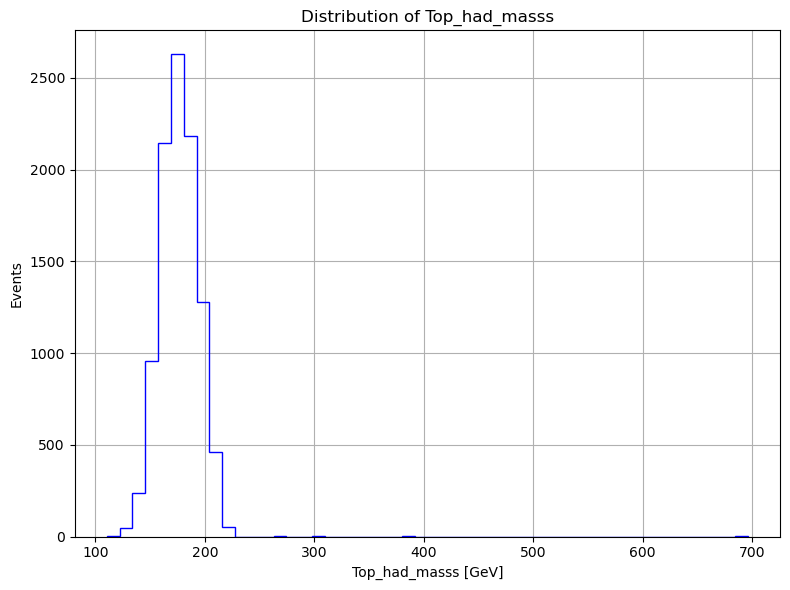

In [92]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# File path and branch name
file_path = '/home/mukund/Projects/SkimandSlim/NanoAODTools/May17/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/selected_SemiLeptonic_10k_Skim.root'
branch_name = 'chi2_status'

# Load the data
with uproot.open(file_path) as file:
    tree = file['Events']
    branches = tree.keys()
    # print(f"Branches in {tree_name}:")
    # for branch in branches:
    #     print(branch)
    top_had_mass = tree['Top_had_mass'].array(library='np')  # NumPy array
    top_lep_mass = tree['Top_lep_mass'].array(library='np')  # NumPy array
    genpart_mass = tree['GenPart_mass'].array(library='ak')
    genpart_muon_charge = tree['Muon_charge'].array(library='ak')


    # chi2_status = tree['chi_status'].array(library='np')  # NumPy array


# Filter out NaNs or invalid entries if needed
top_had_mass = top_had_mass[~np.isnan(top_had_mass)]

# Compute statistics
mean = np.mean(top_had_mass)
std = np.std(top_had_mass)
min_val = np.min(top_had_mass)
max_val = np.max(top_had_mass)
median = np.median(top_had_mass)
percentiles = np.percentile(top_had_mass, [5, 25, 75, 95])

# Print summary
print(f"Top_had_masss statistics:")
print(f"  Entries      : {len(top_had_mass)}")
print(f"  Mean         : {mean:.2f} GeV")
print(f"  Std Dev      : {std:.2f} GeV")
print(f"  Min          : {min_val:.2f} GeV")
print(f"  5th percentile : {percentiles[0]:.2f} GeV")
print(f"  25th percentile: {percentiles[1]:.2f} GeV")
print(f"  Median       : {median:.2f} GeV")
print(f"  75th percentile: {percentiles[2]:.2f} GeV")
print(f"  95th percentile: {percentiles[3]:.2f} GeV")
print(f"  Max          : {max_val:.2f} GeV")

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(top_had_mass, bins=50, histtype='step', color='blue')
plt.xlabel('Top_had_masss [GeV]')
plt.ylabel('Events')
plt.title('Distribution of Top_had_masss')
plt.grid(True)
plt.tight_layout()
plt.show()


In [93]:
gen_first_top_mass = genpart_mass[:,2]
gen_second_top_mass = genpart_mass[:,3]
gen_muon_charge = genpart_muon_charge[:,0]

In [94]:
gen_top_had_mass = []
gen_top_lep_mass = []
for i in range(len(gen_muon_charge)):
    if gen_muon_charge[i] == 1:
        gen_top_had_mass.append(gen_second_top_mass[i])
        gen_top_lep_mass.append(gen_first_top_mass[i])
    else:
        gen_top_had_mass.append(gen_first_top_mass[i])
        gen_top_lep_mass.append(gen_second_top_mass[i])

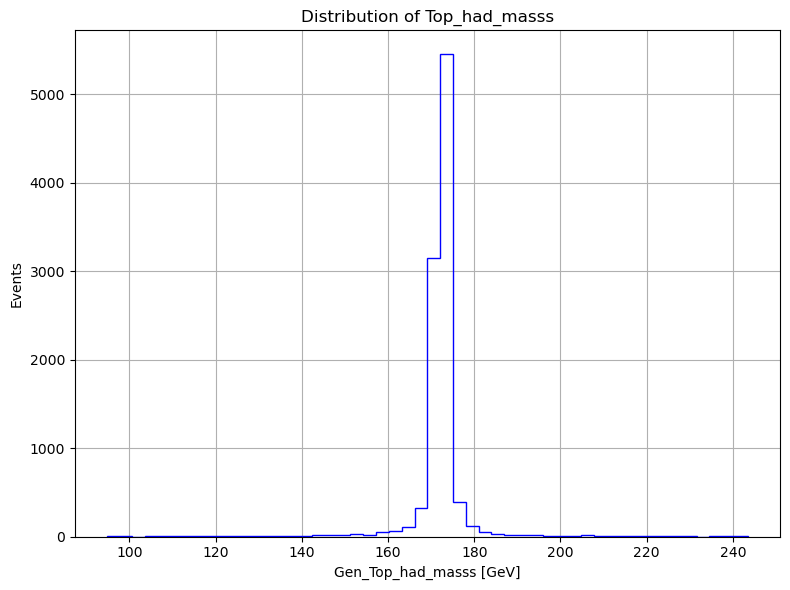

In [95]:
plt.figure(figsize=(8, 6))
plt.hist(gen_top_had_mass, bins=50, histtype='step', color='blue')
plt.xlabel('Gen_Top_had_masss [GeV]')
plt.ylabel('Events')
plt.title('Distribution of Top_had_masss')
plt.grid(True)
plt.tight_layout()
plt.show()

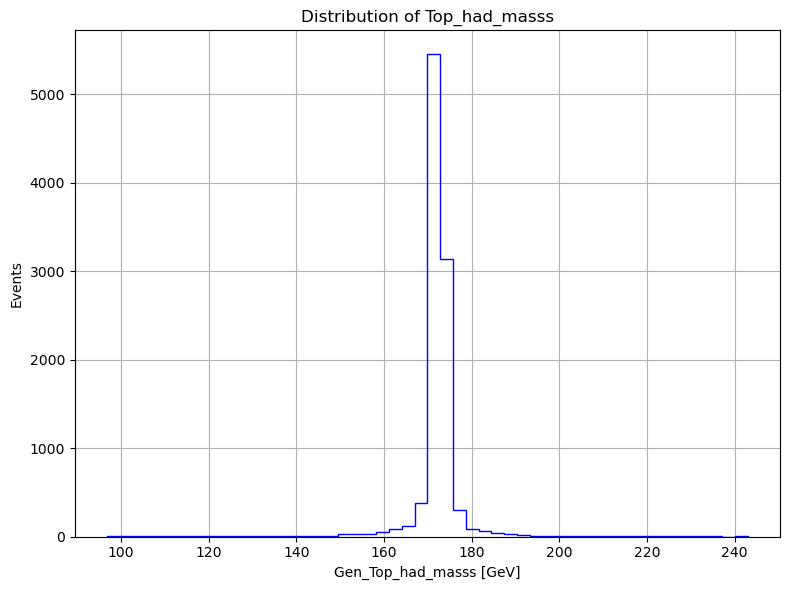

In [96]:
plt.figure(figsize=(8, 6))
plt.hist(gen_top_lep_mass, bins=50, histtype='step', color='blue')
plt.xlabel('Gen_Top_had_masss [GeV]')
plt.ylabel('Events')
plt.title('Distribution of Top_had_masss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
gen_top_had_mass_array = np.array(gen_top_had_mass)
gen_top_lep_mass_array = np.array(gen_top_lep_mass)

In [98]:
delta_top_had_mass = gen_top_had_mass_array - top_had_mass
delta_top_lep_mass = gen_top_lep_mass_array - top_lep_mass


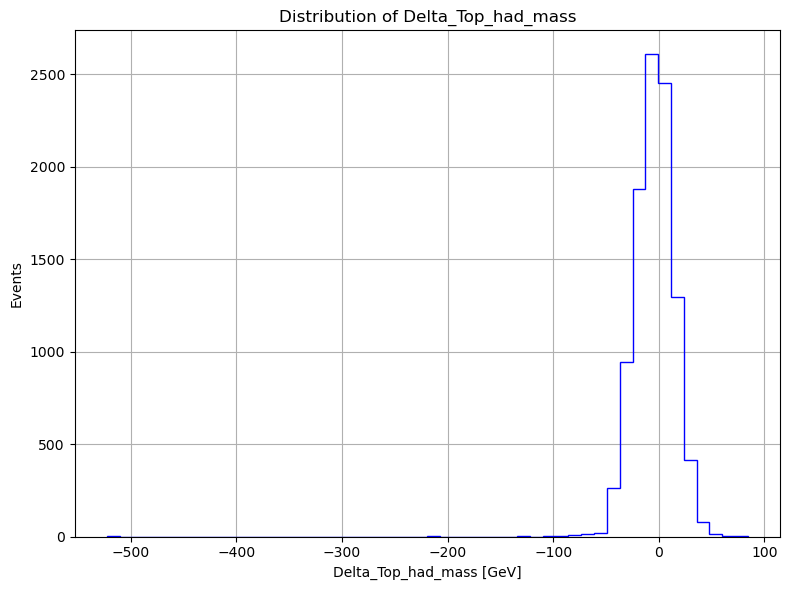

In [99]:
plt.figure(figsize=(8, 6))
plt.hist(delta_top_had_mass, bins=50, histtype='step', color='blue')
plt.xlabel('Delta_Top_had_mass [GeV]')
plt.ylabel('Events')
plt.title('Distribution of Delta_Top_had_mass')
plt.grid(True)
plt.tight_layout()
plt.show()

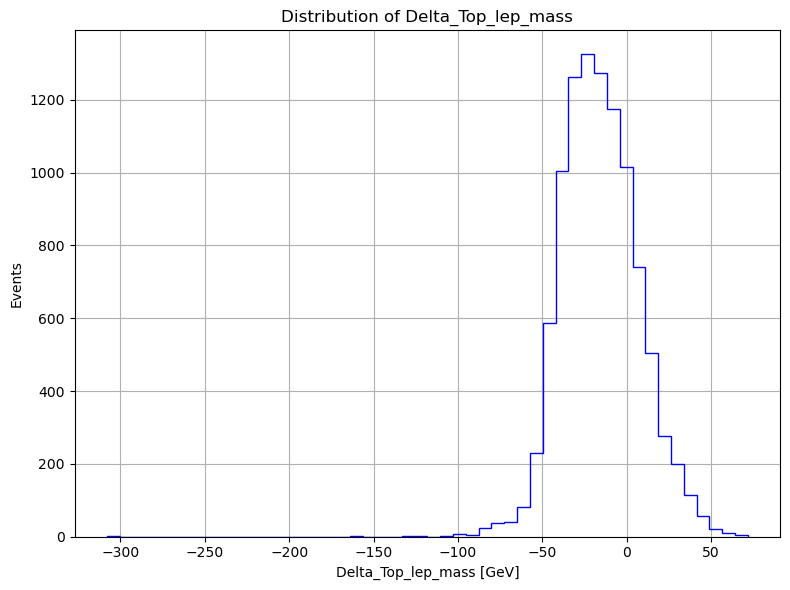

In [100]:
plt.figure(figsize=(8, 6))
plt.hist(delta_top_lep_mass, bins=50, histtype='step', color='blue')
plt.xlabel('Delta_Top_lep_mass [GeV]')
plt.ylabel('Events')
plt.title('Distribution of Delta_Top_lep_mass')
plt.grid(True)
plt.tight_layout()
plt.show()

In [101]:
# import uproot
# import awkward as ak

# # Path to your large NanoAOD file
# input_file = "/mnt/disk1/skimmed_Run2/selection/April052025/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/tree_22_Skim_Skim.root"
# output_file = "/home/mukund/Projects/SkimandSlim/NanoAODTools/selected_SemiLeptonic_10k.root"
# tree_name = "Events"

# # Open the input file
# with uproot.open(f"{input_file}:{tree_name}") as tree:
#     # Get list of branches (or specify them manually)
#     branches = tree.keys()
#     print(f"Branches in {tree_name}:")
#     for branch in branches:
#         print(branch)
#     # arrays = tree.arrays(branches, entry_stop=10000)

# # Convert to dict of {branch_name: array}
# # branch_dict = {key: arrays[key] for key in arrays.fields}

# # # Use uproot to create the output file with correct branch interpretation
# # with uproot.recreate(output_file) as f:
# #     f.mktree(tree_name, {key: branch_dict[key].type for key in branch_dict})
# #     f[tree_name].extend(branch_dict)

# # print(f"Skimmed file saved as: {output_file}")
